# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
bins = [-np.inf, -10.5, np.inf]
labels = ['Abaixo de -10.5', 'Acima de -10.5']
sinasc_raw['faixa_latitude'] = pd.cut(sinasc_raw['munResLat'], bins=bins, labels=labels)

sinasc_raw.groupby('faixa_latitude')[['PESO', 'IDADEMAE']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


C:\Users\Pichau\AppData\Local\Temp\ipykernel_23116\1344839888.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby('faixa_latitude')[['PESO', 'IDADEMAE']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


PESO                                              \
                      sum         mean  min   max  median         std   
faixa_latitude                                                          
Abaixo de -10.5  42098594  3240.098053  258  5985  3270.0  531.815114   
Acima de -10.5   45555148  3246.055864  295  5190  3275.0  556.487709   

                               IDADEMAE                                      \
                           var      sum       mean min max median       std   
faixa_latitude                                                                
Abaixo de -10.5  282827.315354   340143  26.178943  12  53   26.0  6.320385   
Acima de -10.5   309678.570242   365094  26.014964  11  52   25.0  6.447663   

                            
                       var  
faixa_latitude              
Abaixo de -10.5  39.947272  
Acima de -10.5   41.572355

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
bins = [0, 3000, np.inf]
labels = ['Abaixo de 3000', 'Acima de 3000']
sinasc_raw['faixa_area'] = pd.cut(sinasc_raw['munResArea'], bins=bins, labels=labels)

# Realizar operações de groupby
sinasc_raw.groupby('faixa_area')[['PESO', 'IDADEMAE']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


C:\Users\Pichau\AppData\Local\Temp\ipykernel_23116\3111336330.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby('faixa_area')[['PESO', 'IDADEMAE']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


PESO                                              \
                     sum         mean  min   max  median         std   
faixa_area                                                             
Abaixo de 3000  16796616  3218.359073  258  5720  3245.0  531.583103   
Acima de 3000   70857126  3249.134538  292  5985  3280.0  547.716582   

                              IDADEMAE                                      \
                          var      sum       mean min max median       std   
faixa_area                                                                   
Abaixo de 3000  282580.595074   137389  26.324775  11  53   26.0  6.305535   
Acima de 3000   299993.453720   567848  26.038518  12  53   25.0  6.405497   

                           
                      var  
faixa_area                 
Abaixo de 3000  39.759775  
Acima de 3000   41.030387

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
faixas_altitude = pd.cut(sinasc_raw['munResAlt'], bins=[-np.inf, 200, 400, np.inf], labels=['<=200', '201-400', '400>'])

sinasc_raw['faixa_altitude'] = faixas_altitude

sinasc_raw.groupby('faixa_altitude')['munResAlt'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

C:\Users\Pichau\AppData\Local\Temp\ipykernel_23116\3191605109.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby('faixa_altitude')['munResAlt'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


,sum,mean,min,max,median,std,var
faixa_altitude,,,,,,,
<=200,2661326.0,127.782494,85.0,197.0,139.0,37.901396,1436.515831
201-400,1143818.0,260.195177,202.0,397.0,252.0,44.694403,1997.589656
400>,1035716.0,574.121951,419.0,595.0,595.0,56.924862,3240.439917


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [16]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

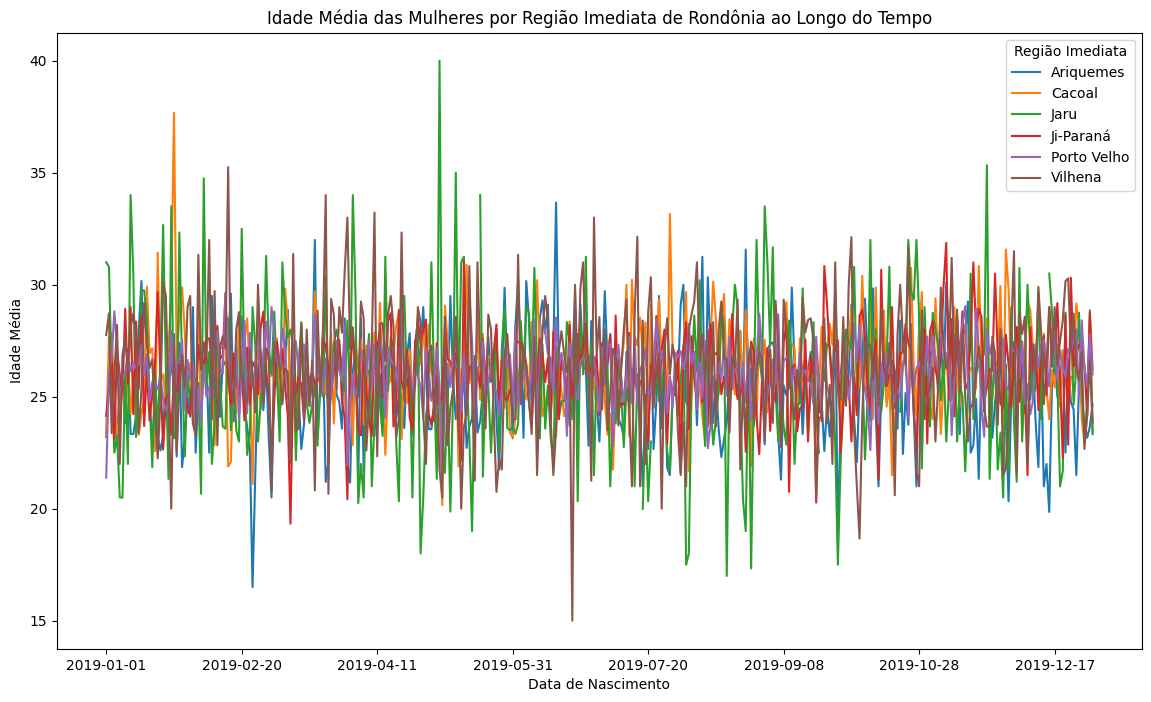

In [45]:
sinasc_raw['RegiaoImediata'] = sinasc_raw['munResNome'].map(imediatas)

idade_media_tempo = sinasc_raw.groupby(['DTNASC', 'RegiaoImediata'])['IDADEMAE'].mean().unstack()

idade_media_tempo.plot(figsize=(14, 8))
plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo do Tempo')
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade Média')
plt.legend(title='Região Imediata')
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [27]:
mapeamento = pd.read_csv('dados_extras_ro.csv', encoding='latin-1',sep=';')

In [28]:
mapeamento.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [40]:
faixas_idh = pd.cut(mapeamento['idh'], bins=[0, 0.5, 0.7, 0.8, 1], labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto'])
faixas_ifdm = pd.cut(mapeamento['ifdm'], bins=[0, 0.5, 0.7, 0.8, 1], labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto'])
faixas_pib = pd.cut(mapeamento['pib'], bins=[0, 10000, 30000, 50000, 1000000], labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'])

mapeamento['faixa_idh'] = faixas_idh
mapeamento['faixa_ifdm'] = faixas_ifdm
mapeamento['faixa_pib'] = faixas_pib

municipios_por_faixa_idh = mapeamento.groupby('faixa_idh')['municipio'].apply(list).explode().reset_index()
municipios_por_faixa_ifdm = mapeamento.groupby('faixa_ifdm')['municipio'].apply(list).explode().reset_index()
municipios_por_faixa_pib = mapeamento.groupby('faixa_pib')['municipio'].apply(list).explode().reset_index()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_23116\4041230218.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  municipios_por_faixa_idh = mapeamento.groupby('faixa_idh')['municipio'].apply(list).explode().reset_index()
C:\Users\Pichau\AppData\Local\Temp\ipykernel_23116\4041230218.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  municipios_por_faixa_ifdm = mapeamento.groupby('faixa_ifdm')['municipio'].apply(list).explode().reset_index()
C:\Users\Pichau\AppData\Local\Temp\ipykernel_23116\4041230218.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future 

In [41]:
municipios_por_faixa_idh

,faixa_idh,municipio
0,Muito Baixo,NaN
1,Baixo,Alta Floresta D'Oeste
2,Baixo,Alto Alegre dos Parecis
3,Baixo,Alto Paraíso
4,Baixo,Alvorada D'Oeste
5,Baixo,Buritis
6,Baixo,Cabixi
7,Baixo,Cacaulândia
8,Baixo,Campo Novo de Rondônia
9,Baixo,Candeias do Jamari


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [42]:
municipios_por_faixa_ifdm

,faixa_ifdm,municipio
0,Muito Baixo,Governador Jorge Teixeira
1,Baixo,Alta Floresta D'Oeste
2,Baixo,Alto Alegre dos Parecis
3,Baixo,Alto Paraíso
4,Baixo,Alvorada D'Oeste
5,Baixo,Buritis
6,Baixo,Cabixi
7,Baixo,Cacaulândia
8,Baixo,Campo Novo de Rondônia
9,Baixo,Candeias do Jamari


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [43]:
municipios_por_faixa_pib

,faixa_pib,municipio
0,Baixo,NaN
1,Médio,NaN
2,Alto,NaN
3,Muito Alto,Alta Floresta D'Oeste
4,Muito Alto,Alto Alegre dos Parecis
5,Muito Alto,Alto Paraíso
6,Muito Alto,Alvorada D'Oeste
7,Muito Alto,Buritis
8,Muito Alto,Cabixi
9,Muito Alto,Cacaulândia


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [46]:
vilhena_data = sinasc_raw[sinasc_raw['RegiaoImediata'] == 'Vilhena']

Descobri que a cidade Vilhena que tem um PIB médio e um IFDM médio o que é alto comparado as outras tem a idade média da mãe maior